# EDA and Sales Prediction on Black Friday Sales

-----------------------------------------------------------------------------------------------------

A retail company “ABC Private Limited” wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summary of various customers for selected high volume products from last month.
The data set also contains customer demographics (age, gender, marital status, city_type, stay_in_current_city), product details (product_id and product category) and Total purchase_amount from last month.

Now, they want to build a model to predict the purchase amount of customer against various products which will help them to create personalized offer for customers against different products.

-----------------------------------------------------------------------------------------------------

In [2]:
# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score


from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

from xgboost import XGBRegressor

In [3]:
# Load data set to python environment
data=pd.read_csv("train.csv")

## 1. Data Understanding

In [262]:
# Display first 5 rows
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [263]:
#Displat no. of rows and columns of dataset
data.shape

(550068, 12)

In [264]:
# Display basic information of data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [265]:

#Display column headings
data.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [266]:
# Dispay unique value counts for each column
data.apply(lambda x:len(x.unique()))

User_ID                        5891
Product_ID                     3631
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category_1               20
Product_Category_2               18
Product_Category_3               16
Purchase                      18105
dtype: int64

In [267]:
# Display unique values in columns if no.of unique values are less than 22
for i in data.columns:
    if data[i].nunique()<22:
        print(i,':',data[i].unique())

Gender : ['F' 'M']
Age : ['0-17' '55+' '26-35' '46-50' '51-55' '36-45' '18-25']
Occupation : [10 16 15  7 20  9  1 12 17  0  3  4 11  8 19  2 18  5 14 13  6]
City_Category : ['A' 'C' 'B']
Stay_In_Current_City_Years : ['2' '4+' '3' '1' '0']
Marital_Status : [0 1]
Product_Category_1 : [ 3  1 12  8  5  4  2  6 14 11 13 15  7 16 18 10 17  9 20 19]
Product_Category_2 : [nan  6. 14.  2.  8. 15. 16. 11.  5.  3.  4. 12.  9. 10. 17. 13.  7. 18.]
Product_Category_3 : [nan 14. 17.  5.  4. 16. 15.  8.  9. 13.  6. 12.  3. 18. 11. 10.]


In [268]:
# Checking Percentage of missing values
percent_missing = data.isnull().sum() * 100 / len(data) 
missing_value_df = pd.DataFrame({'percent_missing': percent_missing}) 
missing_value_df

,percent_missing
User_ID,0.000000
Product_ID,0.000000
Gender,0.000000
Age,0.000000
Occupation,0.000000
City_Category,0.000000
Stay_In_Current_City_Years,0.000000
Marital_Status,0.000000
Product_Category_1,0.000000
Product_Category_2,31.566643


1. 'User_ID'- (Discrete) - indicates the particular customer and there are 5891 unique customers.
2. 'Product_ID'-(Discrete)- inidcates a product and there are 3631 products in this transactions data.
3. 'Gender'-(Nominal)-Catrgorical feature indicating the customer's sex and this column can be encoded as 0 and 1.
4. 'Age'- (Ordinal) - Catrgorical feature - indicates particular age groups. This column can be label encoded as this is an ordinal value.
5. 'Occupation'-(Nominal)- Catrgorical feature - Here values from 1 to 20 can be misleading to ML model as they have an ordinal character.
6. 'City_Category'-(Nominal)- Catrgorical feature - 
7. 'Stay_In_Current_City_Years'- (Ordinal) -Catrgorical feature  
8. 'Marital_Status'-(Nominal)- already encoded
9. 'Product_Category_1'-(Nominal)-indicates the 1st category of a  product.
10. 'Product_Category_2'-(Nominal)-	~31% missing values
11. Product_Category_3'-(Nominal)-	~70% missing values
12. 'Purchase'- Target -  This is a continuous variable.

In [269]:
print(f"Skewness of purchase column : {data['Purchase'].skew()}")
print(f"Kurtosis of purchase column : {data['Purchase'].kurt()}")

Skewness of purchase column : 0.6001400037087128
Kurtosis of purchase column : -0.3383775655851702


In [270]:
# Checking why Product_Category_2 is showing float data type
data['Product_Category_2'].unique()

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [271]:
# Checking why Product_Category_3 is showing float data type
data['Product_Category_3'].unique()

array([nan, 14., 17.,  5.,  4., 16., 15.,  8.,  9., 13.,  6., 12.,  3.,
       18., 11., 10.])

In [272]:
# Checking total amount of purchase
data['Purchase'].sum()

5095812742

## 2. Exploratory Data Analysis

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


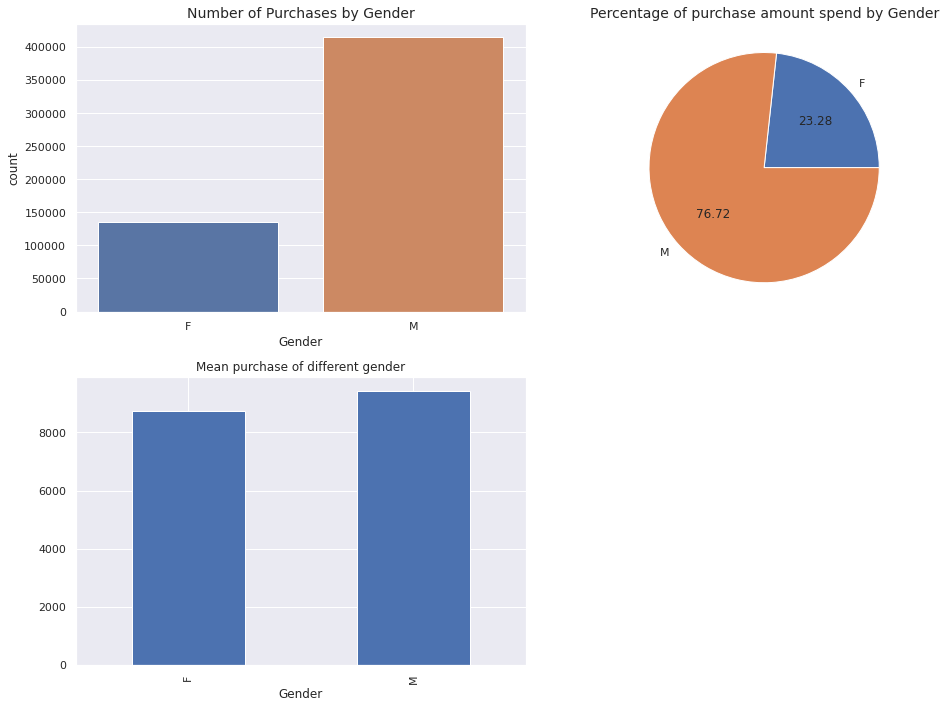

In [273]:
plt.figure(figsize=(14,10))

plt.subplot(2,2,1)
sns.countplot(data['Gender'])
plt.title('Number of Purchases by Gender',fontsize=14)

plt.subplot(2,2,2) 
plt.pie(data.groupby('Gender')["Purchase"].sum(),labels=data['Gender'].unique(),autopct='%.2f')
plt.title("Percentage of purchase amount spend by Gender",fontsize=14)

plt.subplot(2,2,3)
data.groupby('Gender')["Purchase"].mean().plot.bar(title="Mean purchase of different gender")

plt.tight_layout()
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


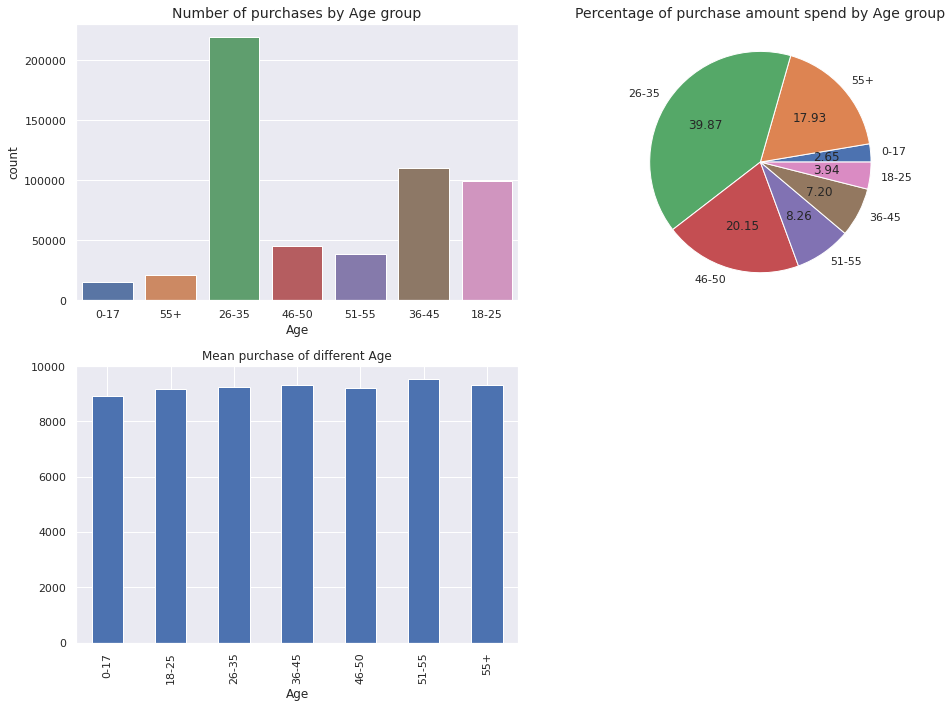

In [274]:
plt.figure(figsize=(14,10))

plt.subplot(2,2,1)
sns.countplot(data['Age'])
plt.title('Number of purchases by Age group',fontsize=14)

plt.subplot(2,2,2) 
plt.pie(data.groupby('Age')["Purchase"].sum(),labels=data['Age'].unique(),autopct='%.2f')
plt.title("Percentage of purchase amount spend by Age group",fontsize=14)

plt.subplot(2,2,3)
data.groupby('Age')["Purchase"].mean().plot.bar(title="Mean purchase of different Age")

plt.tight_layout()
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


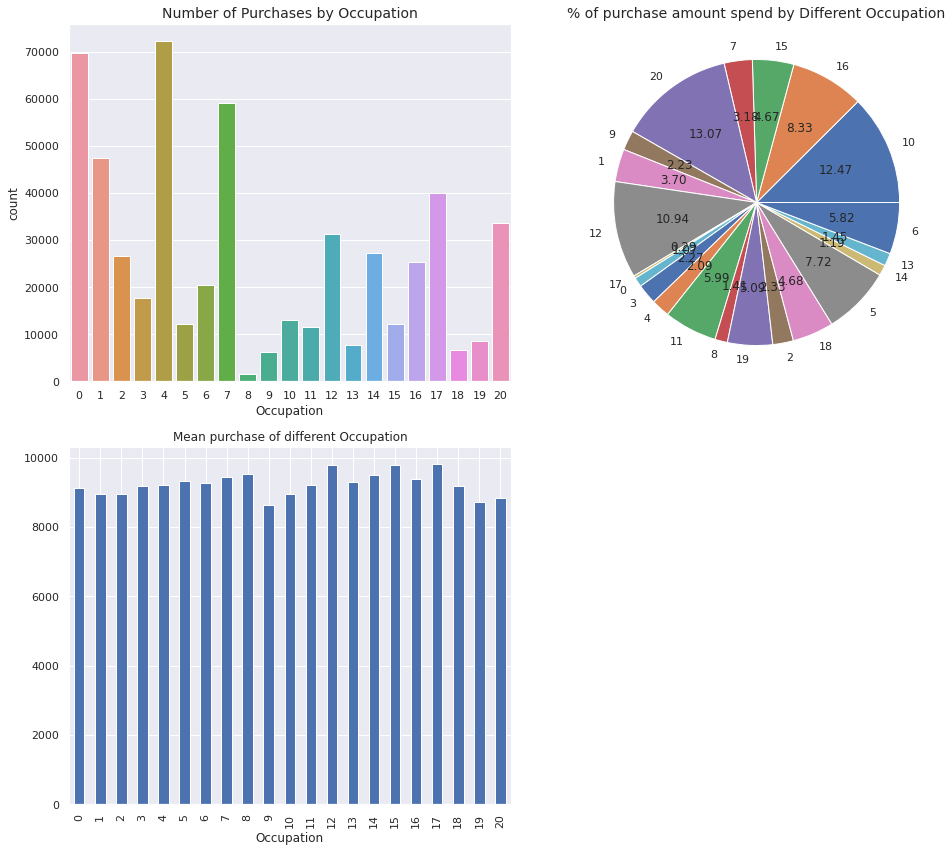

In [275]:
plt.figure(figsize=(14,12))

plt.subplot(2,2,1)
sns.countplot(data['Occupation'])
plt.title('Number of Purchases by Occupation',fontsize=14)

plt.subplot(2,2,2) 
plt.pie(data.groupby('Occupation')["Purchase"].sum(),labels=data['Occupation'].unique(),autopct='%.2f')
plt.title("% of purchase amount spend by Different Occupation",fontsize=14)

plt.subplot(2,2,3)
data.groupby('Occupation')["Purchase"].mean().plot.bar(title="Mean purchase of different Occupation")


plt.tight_layout()
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


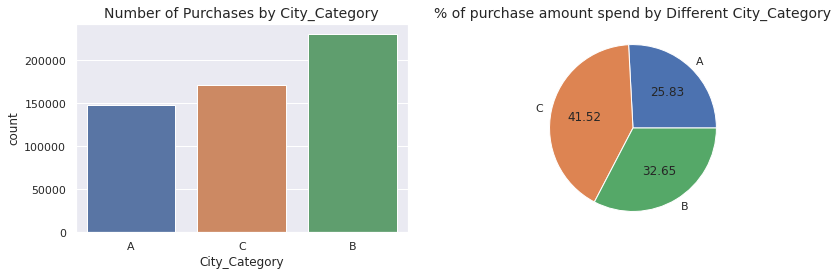

In [276]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
sns.countplot(data['City_Category'])
plt.title('Number of Purchases by City_Category',fontsize=14)

plt.subplot(1,2,2) 
plt.pie(data.groupby('City_Category')["Purchase"].sum(),labels=data['City_Category'].unique(),autopct='%.2f')
plt.title("% of purchase amount spend by Different City_Category",fontsize=14)

plt.tight_layout()
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


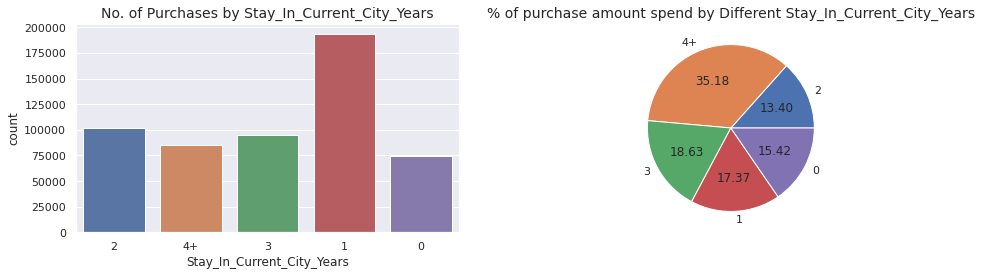

In [277]:
plt.figure(figsize=(14,4))

plt.subplot(1,2,1)
sns.countplot(data['Stay_In_Current_City_Years'])
plt.title('No. of Purchases by Stay_In_Current_City_Years',fontsize=14)

plt.subplot(1,2,2) 
plt.pie(data.groupby('Stay_In_Current_City_Years')["Purchase"].sum(),labels=data['Stay_In_Current_City_Years'].unique(),autopct='%.2f')
plt.title("% of purchase amount spend by Different Stay_In_Current_City_Years",fontsize=14)

plt.tight_layout()
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


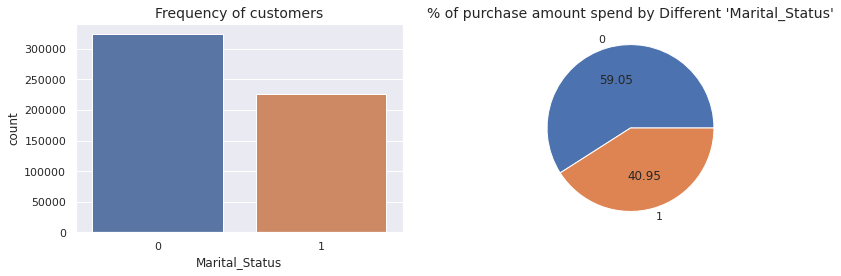

In [278]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
sns.countplot(data['Marital_Status'])
plt.title('Frequency of customers',fontsize=14)

plt.subplot(1,2,2) 
plt.pie(data.groupby('Marital_Status')["Purchase"].sum(),labels=data['Marital_Status'].unique(),autopct='%.2f')
plt.title("% of purchase amount spend by Different 'Marital_Status'",fontsize=14)

plt.tight_layout()
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


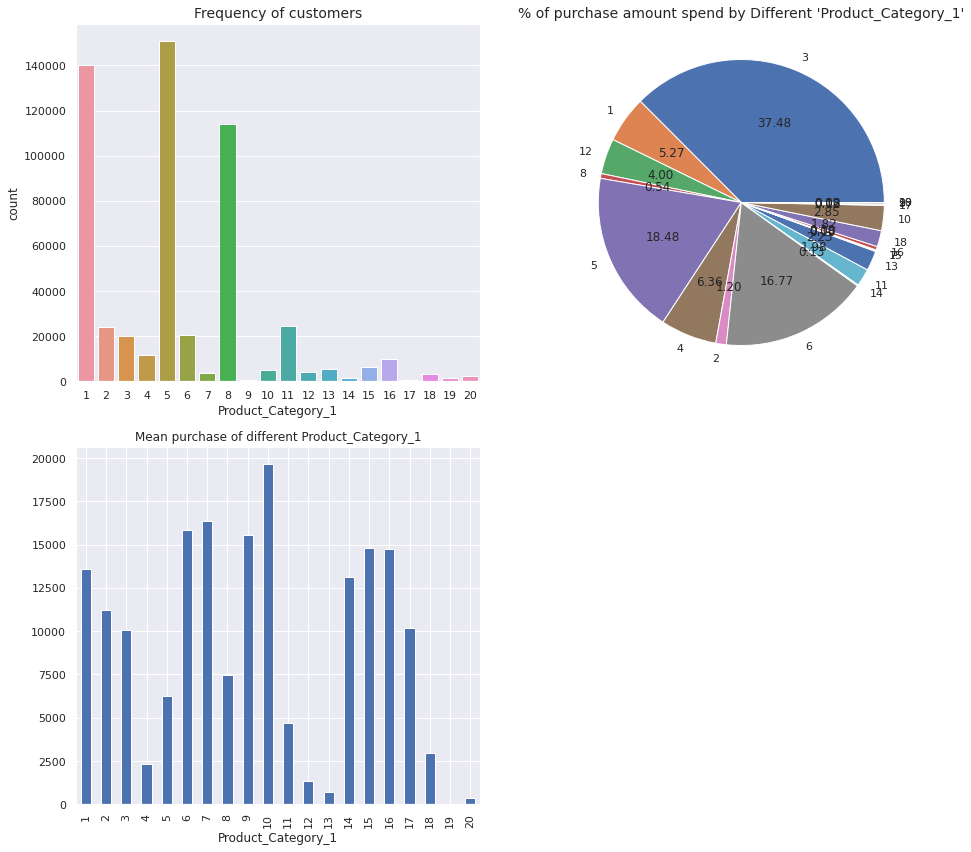

In [279]:
plt.figure(figsize=(14,12))

plt.subplot(2,2,1)
sns.countplot(data['Product_Category_1'])
plt.title('Frequency of customers',fontsize=14)

plt.subplot(2,2,2) 
plt.pie(data.groupby('Product_Category_1')["Purchase"].sum(),labels=data['Product_Category_1'].unique(),autopct='%.2f')
plt.title("% of purchase amount spend by Different 'Product_Category_1'",fontsize=14)

plt.subplot(2,2,3)
data.groupby('Product_Category_1')["Purchase"].mean().plot.bar(title="Mean purchase of different Product_Category_1")

plt.tight_layout()
plt.show()


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


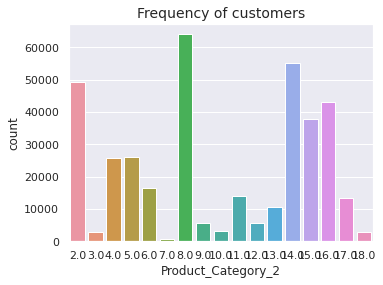

In [280]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
sns.countplot(data['Product_Category_2'])
plt.title('Frequency of customers',fontsize=14)

plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


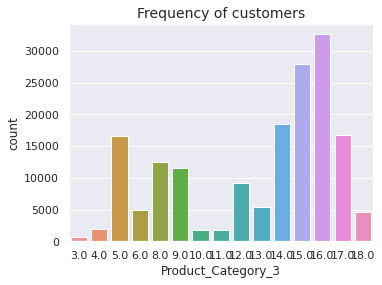

In [281]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
sns.countplot(data['Product_Category_3'])
plt.title('Frequency of customers',fontsize=14)

plt.show()

## 3. Data Pre-Processing

### 3.1 Handling Missing Values

In [282]:
data.isna().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [283]:
product_data = data[['Product_ID','Product_Category_1','Product_Category_2','Product_Category_3']].drop_duplicates()
product_data.head()

,Product_ID,Product_Category_1,Product_Category_2,Product_Category_3
0,P00069042,3,NaN,NaN
1,P00248942,1,6.0,14.0
2,P00087842,12,NaN,NaN
3,P00085442,12,14.0,NaN
4,P00285442,8,NaN,NaN


In [284]:
product_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3631 entries, 0 to 545941
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Product_ID          3631 non-null   object 
 1   Product_Category_1  3631 non-null   int64  
 2   Product_Category_2  1803 non-null   float64
 3   Product_Category_3  528 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 141.8+ KB


In train data, more than 20% of data in Product_Category_2 & Product_Category_3 is missing.
Taking product information out of the transactions data, it is clear that some products don't have second and third product category. This cause the high % of missing values in the train data

We need to check whether values in product category 1,2 and 3 have same meaning.


If these values have same meaning, we can combine these 3 columns into a one hot encoding format in which each column indicate a value between 1 to 20

In [285]:
data.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

Unique values of Product_Category_1 are [ 3  1 12  8  5  4  2  6 14 11 13 15  7 16 18 10 17  9 20 19]


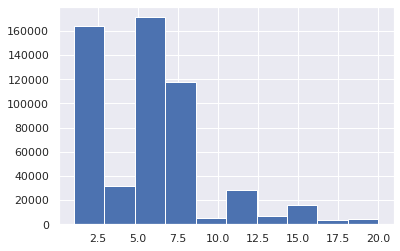

In [286]:
data['Product_Category_1'].hist()
print('Unique values of Product_Category_1 are', data['Product_Category_1'].unique())

Unique values of Product_Category_2 are [nan  6. 14.  2.  8. 15. 16. 11.  5.  3.  4. 12.  9. 10. 17. 13.  7. 18.]


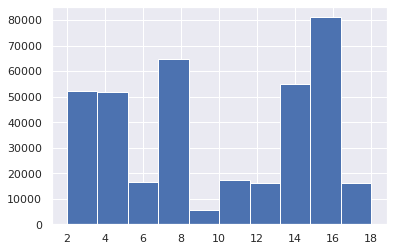

In [287]:
data['Product_Category_2'].hist()
print('Unique values of Product_Category_2 are', data['Product_Category_2'].unique())

Unique values of Product_Category_2 are [nan 14. 17.  5.  4. 16. 15.  8.  9. 13.  6. 12.  3. 18. 11. 10.]


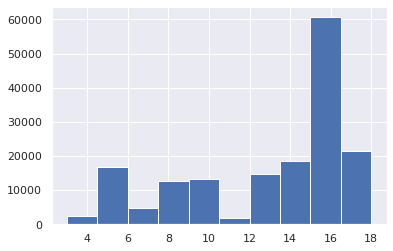

In [288]:
data['Product_Category_3'].hist()
print('Unique values of Product_Category_2 are', data['Product_Category_3'].unique())

Here unique values in all 3 columns are between 1 and 20. Here 1 to 20 indicate same meaning in all 3 columns. A value beteen 1 and 20 indicates the product category to which a product belongs to. 

Products which belong to 3 categories can have 3 of these values, Products which belong to 2 categories can have 2 of these values and so on.

In [289]:
data.dtypes

User_ID                         int64
Product_ID                     object
Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                        int64
dtype: object

In [290]:
data['Product_Category_2'] = data['Product_Category_2'].fillna(0)
data['Product_Category_3'] = data['Product_Category_3'].fillna(0)

In [291]:
data['Product_Category_2']=data['Product_Category_2'].astype('int')
data['Product_Category_3']=data['Product_Category_3'].astype('int')
data.dtypes

User_ID                        int64
Product_ID                    object
Gender                        object
Age                           object
Occupation                     int64
City_Category                 object
Stay_In_Current_City_Years    object
Marital_Status                 int64
Product_Category_1             int64
Product_Category_2             int64
Product_Category_3             int64
Purchase                       int64
dtype: object

In [292]:
x = pd.get_dummies(data['Product_Category_1'], prefix= "Product_Category_value")
x["Product_Category_value_0"]=0
x

,Product_Category_value_1,Product_Category_value_2,Product_Category_value_3,Product_Category_value_4,Product_Category_value_5,Product_Category_value_6,Product_Category_value_7,Product_Category_value_8,Product_Category_value_9,Product_Category_value_10,...,Product_Category_value_12,Product_Category_value_13,Product_Category_value_14,Product_Category_value_15,Product_Category_value_16,Product_Category_value_17,Product_Category_value_18,Product_Category_value_19,Product_Category_value_20,Product_Category_value_0
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
550063,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
550064,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
550065,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
550066,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [293]:
y = pd.get_dummies(data['Product_Category_2'], prefix= "Product_Category_value")
y["Product_Category_value_1"]=0
y["Product_Category_value_19"]=0
y["Product_Category_value_20"]=0
y

,Product_Category_value_0,Product_Category_value_2,Product_Category_value_3,Product_Category_value_4,Product_Category_value_5,Product_Category_value_6,Product_Category_value_7,Product_Category_value_8,Product_Category_value_9,Product_Category_value_10,...,Product_Category_value_12,Product_Category_value_13,Product_Category_value_14,Product_Category_value_15,Product_Category_value_16,Product_Category_value_17,Product_Category_value_18,Product_Category_value_1,Product_Category_value_19,Product_Category_value_20
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
550064,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
550065,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
550066,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [294]:
z = pd.get_dummies(data['Product_Category_3'], prefix= "Product_Category_value")
z["Product_Category_value_1"]=0
z["Product_Category_value_2"]=0
z["Product_Category_value_7"]=0
z["Product_Category_value_19"]=0
z["Product_Category_value_20"]=0
z

,Product_Category_value_0,Product_Category_value_3,Product_Category_value_4,Product_Category_value_5,Product_Category_value_6,Product_Category_value_8,Product_Category_value_9,Product_Category_value_10,Product_Category_value_11,Product_Category_value_12,...,Product_Category_value_14,Product_Category_value_15,Product_Category_value_16,Product_Category_value_17,Product_Category_value_18,Product_Category_value_1,Product_Category_value_2,Product_Category_value_7,Product_Category_value_19,Product_Category_value_20
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
550064,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
550065,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
550066,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [295]:
combined_data = x+y+z
combined_data.drop(["Product_Category_value_0"], axis=1, inplace=True)
combined_data

,Product_Category_value_1,Product_Category_value_10,Product_Category_value_11,Product_Category_value_12,Product_Category_value_13,Product_Category_value_14,Product_Category_value_15,Product_Category_value_16,Product_Category_value_17,Product_Category_value_18,Product_Category_value_19,Product_Category_value_2,Product_Category_value_20,Product_Category_value_3,Product_Category_value_4,Product_Category_value_5,Product_Category_value_6,Product_Category_value_7,Product_Category_value_8,Product_Category_value_9
0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
550063,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
550064,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
550065,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
550066,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [296]:
combined_data.describe()

,Product_Category_value_1,Product_Category_value_10,Product_Category_value_11,Product_Category_value_12,Product_Category_value_13,Product_Category_value_14,Product_Category_value_15,Product_Category_value_16,Product_Category_value_17,Product_Category_value_18,Product_Category_value_19,Product_Category_value_2,Product_Category_value_20,Product_Category_value_3,Product_Category_value_4,Product_Category_value_5,Product_Category_value_6,Product_Category_value_7,Product_Category_value_8,Product_Category_value_9
count,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000
mean,0.255201,0.017987,0.073129,0.034034,0.039157,0.136454,0.131180,0.155833,0.055629,0.019132,0.002914,0.132858,0.004636,0.043104,0.071455,0.352367,0.076031,0.007903,0.346457,0.032145
std,0.435975,0.132904,0.260349,0.181317,0.193968,0.343270,0.337598,0.362698,0.229205,0.136990,0.053905,0.339422,0.067929,0.203091,0.257583,0.477708,0.265047,0.088545,0.475841,0.176386
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


After addition of these 3 product category columns, all the resultant columns from 1 to 20 have maximum value=1.
i.e., Assumption is correct(1 to 20 have same meaning in all 3 product category columns and there is no overlapping)

In [297]:
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,0,0,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6,14,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,0,0,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14,0,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,0,0,7969


In [298]:
data.drop(['Product_Category_1','Product_Category_2','Product_Category_3'], axis=1, inplace=True)
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,8370
1,1000001,P00248942,F,0-17,10,A,2,0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,1422
3,1000001,P00085442,F,0-17,10,A,2,0,1057
4,1000002,P00285442,M,55+,16,C,4+,0,7969


In [299]:
data=pd.concat([data,combined_data], axis=1)
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Purchase,Product_Category_value_1,...,Product_Category_value_19,Product_Category_value_2,Product_Category_value_20,Product_Category_value_3,Product_Category_value_4,Product_Category_value_5,Product_Category_value_6,Product_Category_value_7,Product_Category_value_8,Product_Category_value_9
0,1000001,P00069042,F,0-17,10,A,2,0,8370,0,...,0,0,0,1,0,0,0,0,0,0
1,1000001,P00248942,F,0-17,10,A,2,0,15200,1,...,0,0,0,0,0,0,1,0,0,0
2,1000001,P00087842,F,0-17,10,A,2,0,1422,0,...,0,0,0,0,0,0,0,0,0,0
3,1000001,P00085442,F,0-17,10,A,2,0,1057,0,...,0,0,0,0,0,0,0,0,0,0
4,1000002,P00285442,M,55+,16,C,4+,0,7969,0,...,0,0,0,0,0,0,0,0,1,0


### 3.2 Encoding Categorical Features

In [300]:
# Dispay unique value counts for each column
data.apply(lambda x:x.unique())

User_ID                       [1000001, 1000002, 1000003, 1000004, 1000005, ...
Product_ID                    [P00069042, P00248942, P00087842, P00085442, P...
Gender                                                                   [F, M]
Age                              [0-17, 55+, 26-35, 46-50, 51-55, 36-45, 18-25]
Occupation                    [10, 16, 15, 7, 20, 9, 1, 12, 17, 0, 3, 4, 11,...
City_Category                                                         [A, C, B]
Stay_In_Current_City_Years                                     [2, 4+, 3, 1, 0]
Marital_Status                                                           [0, 1]
Purchase                      [8370, 15200, 1422, 1057, 7969, 15227, 19215, ...
Product_Category_value_1                                                 [0, 1]
Product_Category_value_10                                                [0, 1]
Product_Category_value_11                                                [0, 1]
Product_Category_value_12               

In [301]:
data.drop(['User_ID','Product_ID'], axis=1, inplace=True)

In [302]:
data.dtypes

Gender                        object
Age                           object
Occupation                     int64
City_Category                 object
Stay_In_Current_City_Years    object
Marital_Status                 int64
Purchase                       int64
Product_Category_value_1       int64
Product_Category_value_10      uint8
Product_Category_value_11      uint8
Product_Category_value_12      uint8
Product_Category_value_13      uint8
Product_Category_value_14      uint8
Product_Category_value_15      uint8
Product_Category_value_16      uint8
Product_Category_value_17      uint8
Product_Category_value_18      uint8
Product_Category_value_19      int64
Product_Category_value_2       int64
Product_Category_value_20      int64
Product_Category_value_3       uint8
Product_Category_value_4       uint8
Product_Category_value_5       uint8
Product_Category_value_6       uint8
Product_Category_value_7       int64
Product_Category_value_8       uint8
Product_Category_value_9       uint8
d

In [303]:
# Label encoding ordinal variables
data['Age'] = data['Age'].map({'0-17':1, '18-25':2, '26-35':3, '36-45':4, '46-50':5, '51-55':6, '55+':7})
data['Stay_In_Current_City_Years'] = data['Stay_In_Current_City_Years'].map({'0':1, '1':2, '2':3, '3':4, '4+':5})

In [304]:
data.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Purchase,Product_Category_value_1,Product_Category_value_10,Product_Category_value_11,...,Product_Category_value_19,Product_Category_value_2,Product_Category_value_20,Product_Category_value_3,Product_Category_value_4,Product_Category_value_5,Product_Category_value_6,Product_Category_value_7,Product_Category_value_8,Product_Category_value_9
0,F,1,10,A,3,0,8370,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,F,1,10,A,3,0,15200,1,0,0,...,0,0,0,0,0,0,1,0,0,0
2,F,1,10,A,3,0,1422,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,F,1,10,A,3,0,1057,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,M,7,16,C,5,0,7969,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [305]:
data.dtypes

Gender                        object
Age                            int64
Occupation                     int64
City_Category                 object
Stay_In_Current_City_Years     int64
Marital_Status                 int64
Purchase                       int64
Product_Category_value_1       int64
Product_Category_value_10      uint8
Product_Category_value_11      uint8
Product_Category_value_12      uint8
Product_Category_value_13      uint8
Product_Category_value_14      uint8
Product_Category_value_15      uint8
Product_Category_value_16      uint8
Product_Category_value_17      uint8
Product_Category_value_18      uint8
Product_Category_value_19      int64
Product_Category_value_2       int64
Product_Category_value_20      int64
Product_Category_value_3       uint8
Product_Category_value_4       uint8
Product_Category_value_5       uint8
Product_Category_value_6       uint8
Product_Category_value_7       int64
Product_Category_value_8       uint8
Product_Category_value_9       uint8
d

In [306]:
data['Occupation'] = data['Occupation'].astype(str)
data.dtypes

Gender                        object
Age                            int64
Occupation                    object
City_Category                 object
Stay_In_Current_City_Years     int64
Marital_Status                 int64
Purchase                       int64
Product_Category_value_1       int64
Product_Category_value_10      uint8
Product_Category_value_11      uint8
Product_Category_value_12      uint8
Product_Category_value_13      uint8
Product_Category_value_14      uint8
Product_Category_value_15      uint8
Product_Category_value_16      uint8
Product_Category_value_17      uint8
Product_Category_value_18      uint8
Product_Category_value_19      int64
Product_Category_value_2       int64
Product_Category_value_20      int64
Product_Category_value_3       uint8
Product_Category_value_4       uint8
Product_Category_value_5       uint8
Product_Category_value_6       uint8
Product_Category_value_7       int64
Product_Category_value_8       uint8
Product_Category_value_9       uint8
d

In [307]:
data = pd.get_dummies(data)
data.head()

,Age,Stay_In_Current_City_Years,Marital_Status,Purchase,Product_Category_value_1,Product_Category_value_10,Product_Category_value_11,Product_Category_value_12,Product_Category_value_13,Product_Category_value_14,...,Occupation_3,Occupation_4,Occupation_5,Occupation_6,Occupation_7,Occupation_8,Occupation_9,City_Category_A,City_Category_B,City_Category_C
0,1,3,0,8370,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,1,3,0,15200,1,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,1,3,0,1422,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1,3,0,1057,0,0,0,1,0,1,...,0,0,0,0,0,0,0,1,0,0
4,7,5,0,7969,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [308]:
data.describe()

,Age,Stay_In_Current_City_Years,Marital_Status,Purchase,Product_Category_value_1,Product_Category_value_10,Product_Category_value_11,Product_Category_value_12,Product_Category_value_13,Product_Category_value_14,...,Occupation_3,Occupation_4,Occupation_5,Occupation_6,Occupation_7,Occupation_8,Occupation_9,City_Category_A,City_Category_B,City_Category_C
count,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,...,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000
mean,3.496430,2.858418,0.409653,9263.968713,0.255201,0.017987,0.073129,0.034034,0.039157,0.136454,...,0.032087,0.131453,0.022137,0.037005,0.107501,0.002811,0.011437,0.268549,0.420263,0.311189
std,1.353632,1.289443,0.491770,5023.065394,0.435975,0.132904,0.260349,0.181317,0.193968,0.343270,...,0.176231,0.337895,0.147130,0.188773,0.309750,0.052940,0.106330,0.443205,0.493601,0.462980
min,1.000000,1.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,2.000000,0.000000,5823.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,3.000000,0.000000,8047.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.000000,4.000000,1.000000,12054.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
max,7.000000,5.000000,1.000000,23961.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [309]:
data.columns

Index(['Age', 'Stay_In_Current_City_Years', 'Marital_Status', 'Purchase',
       'Product_Category_value_1', 'Product_Category_value_10',
       'Product_Category_value_11', 'Product_Category_value_12',
       'Product_Category_value_13', 'Product_Category_value_14',
       'Product_Category_value_15', 'Product_Category_value_16',
       'Product_Category_value_17', 'Product_Category_value_18',
       'Product_Category_value_19', 'Product_Category_value_2',
       'Product_Category_value_20', 'Product_Category_value_3',
       'Product_Category_value_4', 'Product_Category_value_5',
       'Product_Category_value_6', 'Product_Category_value_7',
       'Product_Category_value_8', 'Product_Category_value_9', 'Gender_F',
       'Gender_M', 'Occupation_0', 'Occupation_1', 'Occupation_10',
       'Occupation_11', 'Occupation_12', 'Occupation_13', 'Occupation_14',
       'Occupation_15', 'Occupation_16', 'Occupation_17', 'Occupation_18',
       'Occupation_19', 'Occupation_2', 'Occupation_20'

In [310]:
clean_data = data.copy()

### 3.3 Checking correlation

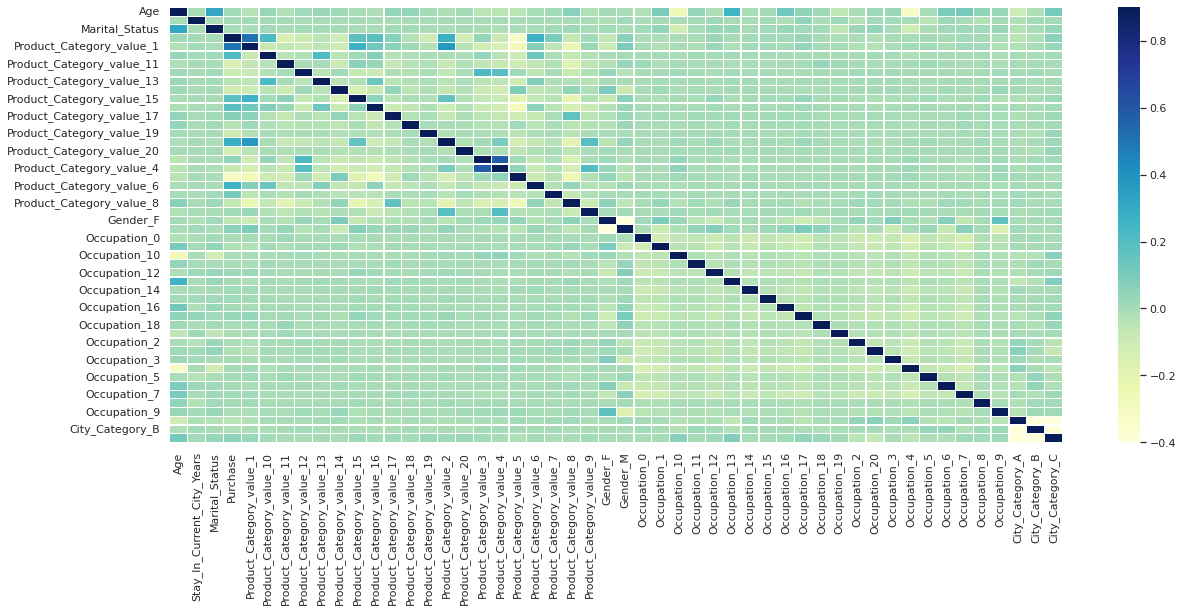

In [311]:
corrmatrix=data.corr()
plt.subplots(figsize=(20,8))
sns.heatmap(corrmatrix, vmin=-0.4, vmax=0.9,  linewidths=0.2, cmap='YlGnBu')

## 4. Modelling Preparation

### 4.1. Splitting data to features and target

In [312]:
X=data.drop(['Purchase'],axis=1)
y=data['Purchase']
print(f'Features shape: {X.shape}')
print(f'Target shape:{y.shape}')

Features shape: (550068, 49)
Target shape:(550068,)


### 4.2 Splitting data to test and train set

In [313]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.2)
print(f'X_train shape is : {X_train.shape}')
print(f'X_test shape is : {X_test.shape}')
print(f'y_train shape is : {y_train.shape}')
print(f'y_test shape is : {y_test.shape}')

X_train shape is : (440054, 49)
X_test shape is : (110014, 49)
y_train shape is : (440054,)
y_test shape is : (110014,)


### 4.3 Model Requirements

In [314]:
from sklearn.metrics import mean_squared_error,r2_score

In [477]:
def evaluate(model):
    y_pred=model.predict(X_test)
    rms=mean_squared_error(y_test,y_pred,squared=False)
    r_sq = r2_score(y_test,y_pred)
    print(f'RMSE is:{rms}')
    print(f'R squared error is:{r_sq}')

## 5. Baseline Models

Linear Regression Model

In [316]:
# Building and evaluating linear regression model
from sklearn import linear_model
lr=linear_model.LinearRegression()
model=lr.fit(X_train,y_train)
evaluate(model)

RMSE is:3633.792549038455
RMSE is:0.47447449957008003


Decision Tree Regression Model

In [317]:
# Building and evaluating Decision Tree Regression model
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()
model=dt.fit(X_train,y_train)
evaluate(model)

RMSE is:3336.981412614948
RMSE is:0.5568190241195781



Random Forest Regression Model

In [318]:
## Building and evaluating Random Forest model
from sklearn.ensemble import RandomForestRegressor
rfc=RandomForestRegressor()
model=rfc.fit(X_train,y_train)
evaluate(model)

RMSE is:3058.632881150415
RMSE is:0.6276698199980395


XGB Regression Model

In [319]:
xgb=XGBRegressor()
model=xgb.fit(X_train,y_train)
evaluate(model)

[09:13:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
RMSE is:3245.5419701774504
RMSE is:0.5807742082850076


## 6. Modeling after standard scaling

In [320]:
data = clean_data.copy()

In [321]:
X=data.drop(['Purchase'],axis=1)
y=data['Purchase']
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.2)

In [322]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [323]:
lr=linear_model.LinearRegression()
model=lr.fit(X_train,y_train)
evaluate(model)

RMSE is:3633.798532036426
RMSE is:0.4744727690251749


In [324]:
dt=DecisionTreeRegressor()
model=dt.fit(X_train,y_train)
evaluate(model)

RMSE is:3337.0308195981634
RMSE is:0.5568059006439419


In [325]:
rfc=RandomForestRegressor()
model=rfc.fit(X_train,y_train)
evaluate(model)

RMSE is:3058.392034511389
RMSE is:0.6277284546530091


In [326]:
xgb=XGBRegressor()
model=xgb.fit(X_train,y_train)
evaluate(model)

[09:21:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
RMSE is:3245.5419701774504
RMSE is:0.5807742082850076


## 7. Modeling after MinMax Scaling

In [327]:
data = clean_data.copy()

In [328]:
X=data.drop(['Purchase'],axis=1)
y=data['Purchase']
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.2)

In [329]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [330]:
lr=linear_model.LinearRegression()
model=lr.fit(X_train,y_train)
evaluate(model)

RMSE is:3633.7927333312336
RMSE is:0.4744744462645841


In [331]:
dt=DecisionTreeRegressor()
model=dt.fit(X_train,y_train)
evaluate(model)

RMSE is:3336.984595609811
RMSE is:0.5568181786588049


In [332]:

rfc=RandomForestRegressor()
model=rfc.fit(X_train,y_train)
evaluate(model)

RMSE is:3057.632430412705
RMSE is:0.627913351730933


In [333]:
xgb=XGBRegressor()
model=xgb.fit(X_train,y_train)
evaluate(model)

[09:28:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
RMSE is:3245.5419701774504
RMSE is:0.5807742082850076


## 8. Clustering customer features and building model

In [334]:
data = clean_data.copy()

In [335]:
data.columns

Index(['Age', 'Stay_In_Current_City_Years', 'Marital_Status', 'Purchase',
       'Product_Category_value_1', 'Product_Category_value_10',
       'Product_Category_value_11', 'Product_Category_value_12',
       'Product_Category_value_13', 'Product_Category_value_14',
       'Product_Category_value_15', 'Product_Category_value_16',
       'Product_Category_value_17', 'Product_Category_value_18',
       'Product_Category_value_19', 'Product_Category_value_2',
       'Product_Category_value_20', 'Product_Category_value_3',
       'Product_Category_value_4', 'Product_Category_value_5',
       'Product_Category_value_6', 'Product_Category_value_7',
       'Product_Category_value_8', 'Product_Category_value_9', 'Gender_F',
       'Gender_M', 'Occupation_0', 'Occupation_1', 'Occupation_10',
       'Occupation_11', 'Occupation_12', 'Occupation_13', 'Occupation_14',
       'Occupation_15', 'Occupation_16', 'Occupation_17', 'Occupation_18',
       'Occupation_19', 'Occupation_2', 'Occupation_20'

In [337]:
customer_data = data[['Gender_F', 'Gender_M', 'Age', 'Marital_Status',
       'Occupation_0', 'Occupation_1', 'Occupation_10',
       'Occupation_11', 'Occupation_12', 'Occupation_13', 'Occupation_14',
       'Occupation_15', 'Occupation_16', 'Occupation_17', 'Occupation_18',
       'Occupation_19', 'Occupation_2', 'Occupation_20', 'Occupation_3',
       'Occupation_4', 'Occupation_5', 'Occupation_6', 'Occupation_7',
       'Occupation_8', 'Occupation_9']]

In [338]:
customer_data.head()

,Gender_F,Gender_M,Age,Marital_Status,Occupation_0,Occupation_1,Occupation_10,Occupation_11,Occupation_12,Occupation_13,...,Occupation_19,Occupation_2,Occupation_20,Occupation_3,Occupation_4,Occupation_5,Occupation_6,Occupation_7,Occupation_8,Occupation_9
0,1,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [339]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
  kmeans.fit(customer_data)
  wcss.append(kmeans.inertia_)

Text(0.5, 1.0, 'K-Means Clustering')

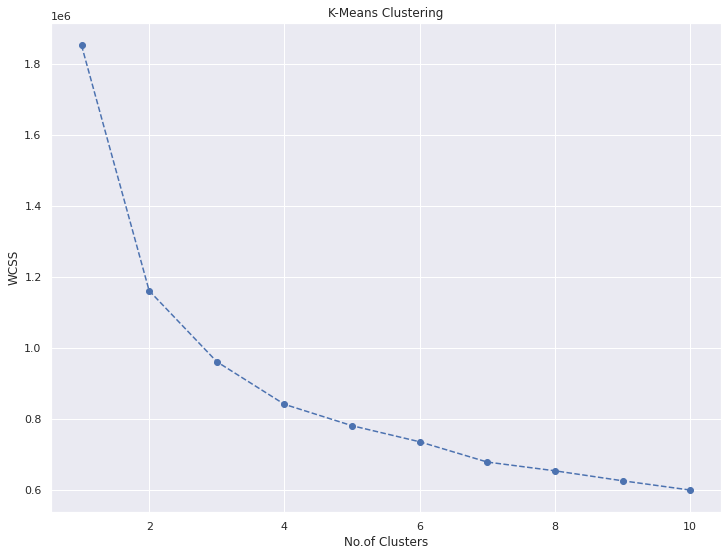

In [340]:
sns.set()
plt.figure(figsize=(12,9))
plt.plot(range(1,11), wcss, marker='o', linestyle='--')
plt.xlabel('No.of Clusters')
plt.ylabel('WCSS')
plt.title('K-Means Clustering')

In [341]:
kmeans=KMeans(n_clusters=4, init='k-means++', random_state=42)
kmeans.fit(customer_data)

KMeans(n_clusters=4, random_state=42)

In [342]:
customer_data['Segment K-Means'] = kmeans.labels_

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [343]:
customer_data.head()

,Gender_F,Gender_M,Age,Marital_Status,Occupation_0,Occupation_1,Occupation_10,Occupation_11,Occupation_12,Occupation_13,...,Occupation_2,Occupation_20,Occupation_3,Occupation_4,Occupation_5,Occupation_6,Occupation_7,Occupation_8,Occupation_9,Segment K-Means
0,1,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,2
1,1,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,2
2,1,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,2
3,1,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,2
4,0,1,7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3


In [344]:
data.insert(2, "Customer_Cluster", customer_data['Segment K-Means'] , True)

In [345]:
data.head()

,Age,Stay_In_Current_City_Years,Customer_Cluster,Marital_Status,Purchase,Product_Category_value_1,Product_Category_value_10,Product_Category_value_11,Product_Category_value_12,Product_Category_value_13,...,Occupation_3,Occupation_4,Occupation_5,Occupation_6,Occupation_7,Occupation_8,Occupation_9,City_Category_A,City_Category_B,City_Category_C
0,1,3,2,0,8370,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,1,3,2,0,15200,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,1,3,2,0,1422,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,1,3,2,0,1057,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,7,5,3,0,7969,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [346]:
data.columns

Index(['Age', 'Stay_In_Current_City_Years', 'Customer_Cluster',
       'Marital_Status', 'Purchase', 'Product_Category_value_1',
       'Product_Category_value_10', 'Product_Category_value_11',
       'Product_Category_value_12', 'Product_Category_value_13',
       'Product_Category_value_14', 'Product_Category_value_15',
       'Product_Category_value_16', 'Product_Category_value_17',
       'Product_Category_value_18', 'Product_Category_value_19',
       'Product_Category_value_2', 'Product_Category_value_20',
       'Product_Category_value_3', 'Product_Category_value_4',
       'Product_Category_value_5', 'Product_Category_value_6',
       'Product_Category_value_7', 'Product_Category_value_8',
       'Product_Category_value_9', 'Gender_F', 'Gender_M', 'Occupation_0',
       'Occupation_1', 'Occupation_10', 'Occupation_11', 'Occupation_12',
       'Occupation_13', 'Occupation_14', 'Occupation_15', 'Occupation_16',
       'Occupation_17', 'Occupation_18', 'Occupation_19', 'Occupation

In [348]:
unnecessary_columns = ['Gender_F','Gender_M', 'Age', 'Marital_Status',
       'Occupation_0', 'Occupation_1', 'Occupation_10',
       'Occupation_11', 'Occupation_12', 'Occupation_13', 'Occupation_14',
       'Occupation_15', 'Occupation_16', 'Occupation_17', 'Occupation_18',
       'Occupation_19', 'Occupation_2', 'Occupation_20', 'Occupation_3',
       'Occupation_4', 'Occupation_5', 'Occupation_6', 'Occupation_7',
       'Occupation_8', 'Occupation_9' ]
data.drop(unnecessary_columns, axis=1, inplace=True)

In [349]:
data.head()

,Stay_In_Current_City_Years,Customer_Cluster,Purchase,Product_Category_value_1,Product_Category_value_10,Product_Category_value_11,Product_Category_value_12,Product_Category_value_13,Product_Category_value_14,Product_Category_value_15,...,Product_Category_value_3,Product_Category_value_4,Product_Category_value_5,Product_Category_value_6,Product_Category_value_7,Product_Category_value_8,Product_Category_value_9,City_Category_A,City_Category_B,City_Category_C
0,3,2,8370,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
1,3,2,15200,1,0,0,0,0,1,0,...,0,0,0,1,0,0,0,1,0,0
2,3,2,1422,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,3,2,1057,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,5,3,7969,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1


In [350]:
from sklearn.model_selection import train_test_split
X=data.drop(['Purchase'],axis=1)
y=data['Purchase']
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.2)

In [351]:
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [352]:
# Building and evaluating linear regression model
from sklearn import linear_model
lr=linear_model.LinearRegression()
model=lr.fit(X_train,y_train)
evaluate(model)


RMSE is:3636.870868702656
RMSE is:0.4735837383712158


In [353]:
# Building and evaluating Decision Tree Regression model
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()
model=dt.fit(X_train,y_train)
evaluate(model)


RMSE is:2982.045904035873
RMSE is:0.6460823812744247


In [354]:

## Building and evaluating Random Forest model
from sklearn.ensemble import RandomForestRegressor
rfc=RandomForestRegressor()
model=rfc.fit(X_train,y_train)
evaluate(model)

RMSE is:2974.8933601932094
RMSE is:0.6477781133494509


In [355]:
## Building and evaluating XGBRegressor model
xgb=XGBRegressor()
model=xgb.fit(X_train,y_train)
evaluate(model)

[10:04:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
RMSE is:3244.6272311172693
RMSE is:0.581010488184643


## 9. Clustering, PCA and modeling

In [356]:
data = clean_data.copy()

In [357]:
data.columns

Index(['Age', 'Stay_In_Current_City_Years', 'Marital_Status', 'Purchase',
       'Product_Category_value_1', 'Product_Category_value_10',
       'Product_Category_value_11', 'Product_Category_value_12',
       'Product_Category_value_13', 'Product_Category_value_14',
       'Product_Category_value_15', 'Product_Category_value_16',
       'Product_Category_value_17', 'Product_Category_value_18',
       'Product_Category_value_19', 'Product_Category_value_2',
       'Product_Category_value_20', 'Product_Category_value_3',
       'Product_Category_value_4', 'Product_Category_value_5',
       'Product_Category_value_6', 'Product_Category_value_7',
       'Product_Category_value_8', 'Product_Category_value_9', 'Gender_F',
       'Gender_M', 'Occupation_0', 'Occupation_1', 'Occupation_10',
       'Occupation_11', 'Occupation_12', 'Occupation_13', 'Occupation_14',
       'Occupation_15', 'Occupation_16', 'Occupation_17', 'Occupation_18',
       'Occupation_19', 'Occupation_2', 'Occupation_20'

In [358]:
customer_data = data[['Gender_F','Gender_M', 'Age', 'Marital_Status',
       'Occupation_0', 'Occupation_1', 'Occupation_10',
       'Occupation_11', 'Occupation_12', 'Occupation_13', 'Occupation_14',
       'Occupation_15', 'Occupation_16', 'Occupation_17', 'Occupation_18',
       'Occupation_19', 'Occupation_2', 'Occupation_20', 'Occupation_3',
       'Occupation_4', 'Occupation_5', 'Occupation_6', 'Occupation_7',
       'Occupation_8', 'Occupation_9']]

In [359]:
customer_data.head()


,Gender_F,Gender_M,Age,Marital_Status,Occupation_0,Occupation_1,Occupation_10,Occupation_11,Occupation_12,Occupation_13,...,Occupation_19,Occupation_2,Occupation_20,Occupation_3,Occupation_4,Occupation_5,Occupation_6,Occupation_7,Occupation_8,Occupation_9
0,1,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [360]:
pca=PCA()
pca.fit(customer_data)

PCA()

In [361]:
pca.explained_variance_ratio_


array([5.57216970e-01, 1.11462631e-01, 6.40059574e-02, 3.71023558e-02,
       3.19606201e-02, 2.85016322e-02, 2.34703011e-02, 2.00510305e-02,
       1.74711135e-02, 1.57262258e-02, 1.45161306e-02, 1.36924244e-02,
       1.14188057e-02, 9.89601478e-03, 7.66807265e-03, 6.57016189e-03,
       6.51413434e-03, 6.24456461e-03, 4.77607621e-03, 3.85445368e-03,
       3.68240623e-03, 3.32904845e-03, 8.68869410e-04, 1.48288616e-30,
       3.84710440e-33])

Text(0, 0.5, 'Cumulative Explained Variance')

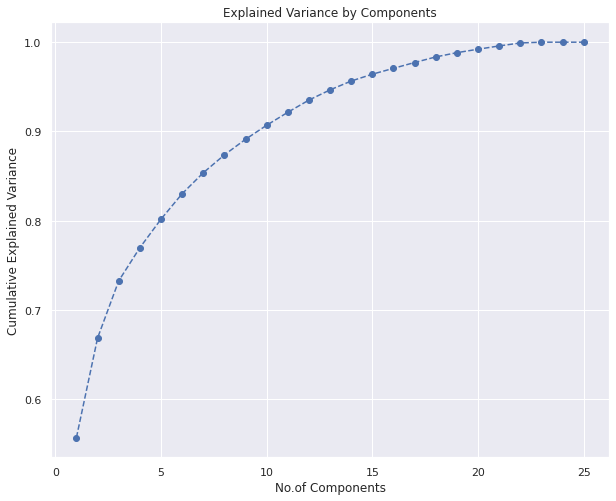

In [364]:
plt.figure(figsize=(10,8))
plt.plot(range(1,26), pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
plt.title('Explained Variance by Components')
plt.xlabel('No.of Components')
plt.ylabel('Cumulative Explained Variance')


In [365]:
pca=PCA(n_components=6)
pca.fit(customer_data)


PCA(n_components=6)

In [366]:
scores_pca=pca.transform(customer_data)


In [367]:
wcss=[]
for i in range(1,11):
  kmeans_pca=KMeans(n_clusters=i,
                    init='k-means++',
                    random_state=42)
  kmeans_pca.fit(scores_pca)
  wcss.append(kmeans_pca.inertia_)

Text(0.5, 1.0, 'K-Means Clustering after PCA')

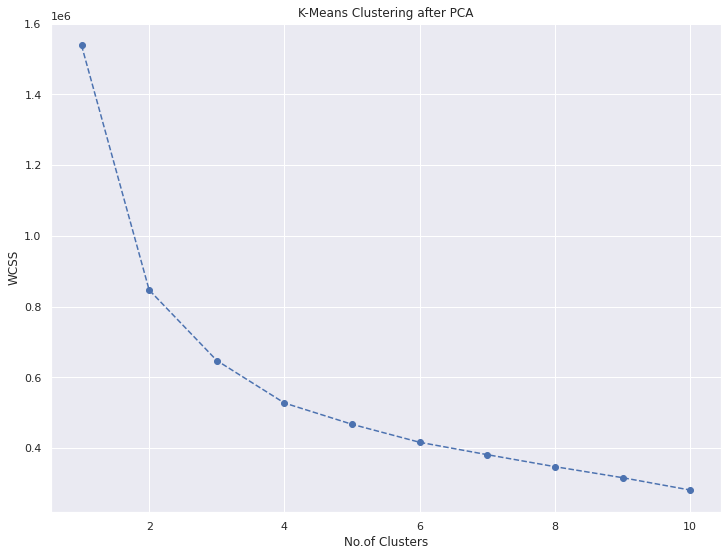

In [368]:
plt.figure(figsize=(12,9))
plt.plot(range(1,11), wcss, marker='o', linestyle='--')
plt.xlabel('No.of Clusters')
plt.ylabel('WCSS')
plt.title('K-Means Clustering after PCA')

In [369]:
kmeans_pca=KMeans(n_clusters=4, init='k-means++', random_state=42)
kmeans_pca.fit(scores_pca)

KMeans(n_clusters=4, random_state=42)

In [370]:
customer_data['Segment K-Means'] = kmeans_pca.labels_

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [371]:
customer_data.head()


,Gender_F,Gender_M,Age,Marital_Status,Occupation_0,Occupation_1,Occupation_10,Occupation_11,Occupation_12,Occupation_13,...,Occupation_2,Occupation_20,Occupation_3,Occupation_4,Occupation_5,Occupation_6,Occupation_7,Occupation_8,Occupation_9,Segment K-Means
0,1,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3


In [372]:
data.insert(2, "Customer_Cluster", customer_data['Segment K-Means'] , True)


In [373]:
data.head()


,Age,Stay_In_Current_City_Years,Customer_Cluster,Marital_Status,Purchase,Product_Category_value_1,Product_Category_value_10,Product_Category_value_11,Product_Category_value_12,Product_Category_value_13,...,Occupation_3,Occupation_4,Occupation_5,Occupation_6,Occupation_7,Occupation_8,Occupation_9,City_Category_A,City_Category_B,City_Category_C
0,1,3,0,0,8370,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,1,3,0,0,15200,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,1,3,0,0,1422,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,1,3,0,0,1057,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,7,5,3,0,7969,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [374]:
data.columns


Index(['Age', 'Stay_In_Current_City_Years', 'Customer_Cluster',
       'Marital_Status', 'Purchase', 'Product_Category_value_1',
       'Product_Category_value_10', 'Product_Category_value_11',
       'Product_Category_value_12', 'Product_Category_value_13',
       'Product_Category_value_14', 'Product_Category_value_15',
       'Product_Category_value_16', 'Product_Category_value_17',
       'Product_Category_value_18', 'Product_Category_value_19',
       'Product_Category_value_2', 'Product_Category_value_20',
       'Product_Category_value_3', 'Product_Category_value_4',
       'Product_Category_value_5', 'Product_Category_value_6',
       'Product_Category_value_7', 'Product_Category_value_8',
       'Product_Category_value_9', 'Gender_F', 'Gender_M', 'Occupation_0',
       'Occupation_1', 'Occupation_10', 'Occupation_11', 'Occupation_12',
       'Occupation_13', 'Occupation_14', 'Occupation_15', 'Occupation_16',
       'Occupation_17', 'Occupation_18', 'Occupation_19', 'Occupation

In [375]:
unnecessary_columns = ['Gender_F','Gender_M', 'Age', 'Marital_Status',
       'Occupation_0', 'Occupation_1', 'Occupation_10',
       'Occupation_11', 'Occupation_12', 'Occupation_13', 'Occupation_14',
       'Occupation_15', 'Occupation_16', 'Occupation_17', 'Occupation_18',
       'Occupation_19', 'Occupation_2', 'Occupation_20', 'Occupation_3',
       'Occupation_4', 'Occupation_5', 'Occupation_6', 'Occupation_7',
       'Occupation_8', 'Occupation_9' ]


In [376]:
data.drop(unnecessary_columns, axis=1, inplace=True)


In [377]:
data.head()


,Stay_In_Current_City_Years,Customer_Cluster,Purchase,Product_Category_value_1,Product_Category_value_10,Product_Category_value_11,Product_Category_value_12,Product_Category_value_13,Product_Category_value_14,Product_Category_value_15,...,Product_Category_value_3,Product_Category_value_4,Product_Category_value_5,Product_Category_value_6,Product_Category_value_7,Product_Category_value_8,Product_Category_value_9,City_Category_A,City_Category_B,City_Category_C
0,3,0,8370,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
1,3,0,15200,1,0,0,0,0,1,0,...,0,0,0,1,0,0,0,1,0,0
2,3,0,1422,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,3,0,1057,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,5,3,7969,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1


In [378]:
X=data.drop(['Purchase'],axis=1)
y=data['Purchase']
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.2)


In [379]:
scaler= MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)


In [380]:
lr=linear_model.LinearRegression()
model=lr.fit(X_train,y_train)
evaluate(model)


RMSE is:3636.1142467732097
RMSE is:0.4738027489825769


In [381]:
dt=DecisionTreeRegressor()
model=dt.fit(X_train,y_train)
evaluate(model)


RMSE is:2982.3008368208016
RMSE is:0.6460218664039487


In [382]:
rfc=RandomForestRegressor()
model=rfc.fit(X_train,y_train)
evaluate(model)


RMSE is:2975.668996079513
RMSE is:0.6475944216893048


In [383]:
xgb=XGBRegressor()
model=xgb.fit(X_train,y_train)
evaluate(model)

[10:09:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
RMSE is:3247.9572964242097
RMSE is:0.5801500020090707


## 10. Clustering customers and products and building model

In [445]:
data = clean_data.copy()

In [446]:
data.columns

Index(['Age', 'Stay_In_Current_City_Years', 'Marital_Status', 'Purchase',
       'Product_Category_value_1', 'Product_Category_value_10',
       'Product_Category_value_11', 'Product_Category_value_12',
       'Product_Category_value_13', 'Product_Category_value_14',
       'Product_Category_value_15', 'Product_Category_value_16',
       'Product_Category_value_17', 'Product_Category_value_18',
       'Product_Category_value_19', 'Product_Category_value_2',
       'Product_Category_value_20', 'Product_Category_value_3',
       'Product_Category_value_4', 'Product_Category_value_5',
       'Product_Category_value_6', 'Product_Category_value_7',
       'Product_Category_value_8', 'Product_Category_value_9', 'Gender_F',
       'Gender_M', 'Occupation_0', 'Occupation_1', 'Occupation_10',
       'Occupation_11', 'Occupation_12', 'Occupation_13', 'Occupation_14',
       'Occupation_15', 'Occupation_16', 'Occupation_17', 'Occupation_18',
       'Occupation_19', 'Occupation_2', 'Occupation_20'

In [447]:
customer_data = data[['Gender_F','Gender_M', 'Age', 'Marital_Status',
       'Occupation_0', 'Occupation_1', 'Occupation_10',
       'Occupation_11', 'Occupation_12', 'Occupation_13', 'Occupation_14',
       'Occupation_15', 'Occupation_16', 'Occupation_17', 'Occupation_18',
       'Occupation_19', 'Occupation_2', 'Occupation_20', 'Occupation_3',
       'Occupation_4', 'Occupation_5', 'Occupation_6', 'Occupation_7',
       'Occupation_8', 'Occupation_9']]


In [448]:
customer_data.head()

,Gender_F,Gender_M,Age,Marital_Status,Occupation_0,Occupation_1,Occupation_10,Occupation_11,Occupation_12,Occupation_13,...,Occupation_19,Occupation_2,Occupation_20,Occupation_3,Occupation_4,Occupation_5,Occupation_6,Occupation_7,Occupation_8,Occupation_9
0,1,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [449]:
kmeans=KMeans(n_clusters=4, init='k-means++', random_state=42)
kmeans.fit(customer_data)

KMeans(n_clusters=4, random_state=42)

In [450]:
customer_data['Segment K-Means'] = kmeans.labels_


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [451]:
customer_data.head()


,Gender_F,Gender_M,Age,Marital_Status,Occupation_0,Occupation_1,Occupation_10,Occupation_11,Occupation_12,Occupation_13,...,Occupation_2,Occupation_20,Occupation_3,Occupation_4,Occupation_5,Occupation_6,Occupation_7,Occupation_8,Occupation_9,Segment K-Means
0,1,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,2
1,1,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,2
2,1,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,2
3,1,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,2
4,0,1,7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3


In [452]:
data.insert(2, "Customer_Cluster", customer_data['Segment K-Means'] , True)


In [453]:
data.head()


,Age,Stay_In_Current_City_Years,Customer_Cluster,Marital_Status,Purchase,Product_Category_value_1,Product_Category_value_10,Product_Category_value_11,Product_Category_value_12,Product_Category_value_13,...,Occupation_3,Occupation_4,Occupation_5,Occupation_6,Occupation_7,Occupation_8,Occupation_9,City_Category_A,City_Category_B,City_Category_C
0,1,3,2,0,8370,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,1,3,2,0,15200,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,1,3,2,0,1422,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,1,3,2,0,1057,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,7,5,3,0,7969,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [454]:
data.columns


Index(['Age', 'Stay_In_Current_City_Years', 'Customer_Cluster',
       'Marital_Status', 'Purchase', 'Product_Category_value_1',
       'Product_Category_value_10', 'Product_Category_value_11',
       'Product_Category_value_12', 'Product_Category_value_13',
       'Product_Category_value_14', 'Product_Category_value_15',
       'Product_Category_value_16', 'Product_Category_value_17',
       'Product_Category_value_18', 'Product_Category_value_19',
       'Product_Category_value_2', 'Product_Category_value_20',
       'Product_Category_value_3', 'Product_Category_value_4',
       'Product_Category_value_5', 'Product_Category_value_6',
       'Product_Category_value_7', 'Product_Category_value_8',
       'Product_Category_value_9', 'Gender_F', 'Gender_M', 'Occupation_0',
       'Occupation_1', 'Occupation_10', 'Occupation_11', 'Occupation_12',
       'Occupation_13', 'Occupation_14', 'Occupation_15', 'Occupation_16',
       'Occupation_17', 'Occupation_18', 'Occupation_19', 'Occupation

In [455]:
unnecessary_columns = ['Gender_F','Gender_M', 'Age', 'Marital_Status',
       'Occupation_0', 'Occupation_1', 'Occupation_10',
       'Occupation_11', 'Occupation_12', 'Occupation_13', 'Occupation_14',
       'Occupation_15', 'Occupation_16', 'Occupation_17', 'Occupation_18',
       'Occupation_19', 'Occupation_2', 'Occupation_20', 'Occupation_3',
       'Occupation_4', 'Occupation_5', 'Occupation_6', 'Occupation_7',
       'Occupation_8', 'Occupation_9' ]
data.drop(unnecessary_columns, axis=1, inplace=True)

In [456]:
data.head()


,Stay_In_Current_City_Years,Customer_Cluster,Purchase,Product_Category_value_1,Product_Category_value_10,Product_Category_value_11,Product_Category_value_12,Product_Category_value_13,Product_Category_value_14,Product_Category_value_15,...,Product_Category_value_3,Product_Category_value_4,Product_Category_value_5,Product_Category_value_6,Product_Category_value_7,Product_Category_value_8,Product_Category_value_9,City_Category_A,City_Category_B,City_Category_C
0,3,2,8370,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
1,3,2,15200,1,0,0,0,0,1,0,...,0,0,0,1,0,0,0,1,0,0
2,3,2,1422,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,3,2,1057,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,5,3,7969,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1


In [457]:
data.columns

Index(['Stay_In_Current_City_Years', 'Customer_Cluster', 'Purchase',
       'Product_Category_value_1', 'Product_Category_value_10',
       'Product_Category_value_11', 'Product_Category_value_12',
       'Product_Category_value_13', 'Product_Category_value_14',
       'Product_Category_value_15', 'Product_Category_value_16',
       'Product_Category_value_17', 'Product_Category_value_18',
       'Product_Category_value_19', 'Product_Category_value_2',
       'Product_Category_value_20', 'Product_Category_value_3',
       'Product_Category_value_4', 'Product_Category_value_5',
       'Product_Category_value_6', 'Product_Category_value_7',
       'Product_Category_value_8', 'Product_Category_value_9',
       'City_Category_A', 'City_Category_B', 'City_Category_C'],
      dtype='object')

In [458]:
product_data = data[['Product_Category_value_1', 'Product_Category_value_10',
       'Product_Category_value_11', 'Product_Category_value_12',
       'Product_Category_value_13', 'Product_Category_value_14',
       'Product_Category_value_15', 'Product_Category_value_16',
       'Product_Category_value_17', 'Product_Category_value_18',
       'Product_Category_value_19', 'Product_Category_value_2',
       'Product_Category_value_20', 'Product_Category_value_3',
       'Product_Category_value_4', 'Product_Category_value_5',
       'Product_Category_value_6', 'Product_Category_value_7',
       'Product_Category_value_8', 'Product_Category_value_9']]

In [459]:
product_data.head()

,Product_Category_value_1,Product_Category_value_10,Product_Category_value_11,Product_Category_value_12,Product_Category_value_13,Product_Category_value_14,Product_Category_value_15,Product_Category_value_16,Product_Category_value_17,Product_Category_value_18,Product_Category_value_19,Product_Category_value_2,Product_Category_value_20,Product_Category_value_3,Product_Category_value_4,Product_Category_value_5,Product_Category_value_6,Product_Category_value_7,Product_Category_value_8,Product_Category_value_9
0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [460]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
  kmeans.fit(product_data)
  wcss.append(kmeans.inertia_)


Text(0.5, 1.0, 'K-Means Clustering')

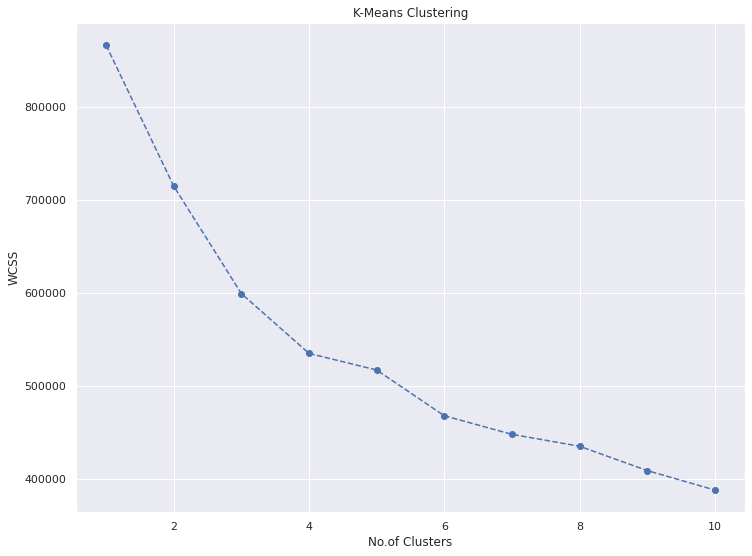

In [461]:

sns.set()
plt.figure(figsize=(12,9))
plt.plot(range(1,11), wcss, marker='o', linestyle='--')
plt.xlabel('No.of Clusters')
plt.ylabel('WCSS')
plt.title('K-Means Clustering')

In [462]:

kmeans=KMeans(n_clusters=4, init='k-means++', random_state=42)
kmeans.fit(product_data)

KMeans(n_clusters=4, random_state=42)

In [463]:
product_data['Segment K-Means'] = kmeans.labels_


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [464]:
product_data.head()

,Product_Category_value_1,Product_Category_value_10,Product_Category_value_11,Product_Category_value_12,Product_Category_value_13,Product_Category_value_14,Product_Category_value_15,Product_Category_value_16,Product_Category_value_17,Product_Category_value_18,...,Product_Category_value_2,Product_Category_value_20,Product_Category_value_3,Product_Category_value_4,Product_Category_value_5,Product_Category_value_6,Product_Category_value_7,Product_Category_value_8,Product_Category_value_9,Segment K-Means
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,3
1,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,2
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
3,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [465]:
data.insert(2, "Product_Cluster", product_data['Segment K-Means'] , True)


In [466]:
data.columns

Index(['Stay_In_Current_City_Years', 'Customer_Cluster', 'Product_Cluster',
       'Purchase', 'Product_Category_value_1', 'Product_Category_value_10',
       'Product_Category_value_11', 'Product_Category_value_12',
       'Product_Category_value_13', 'Product_Category_value_14',
       'Product_Category_value_15', 'Product_Category_value_16',
       'Product_Category_value_17', 'Product_Category_value_18',
       'Product_Category_value_19', 'Product_Category_value_2',
       'Product_Category_value_20', 'Product_Category_value_3',
       'Product_Category_value_4', 'Product_Category_value_5',
       'Product_Category_value_6', 'Product_Category_value_7',
       'Product_Category_value_8', 'Product_Category_value_9',
       'City_Category_A', 'City_Category_B', 'City_Category_C'],
      dtype='object')

In [467]:
unnecessary_columns = ['Product_Category_value_1', 'Product_Category_value_10',
       'Product_Category_value_11', 'Product_Category_value_12',
       'Product_Category_value_13', 'Product_Category_value_14',
       'Product_Category_value_15', 'Product_Category_value_16',
       'Product_Category_value_17', 'Product_Category_value_18',
       'Product_Category_value_19', 'Product_Category_value_2',
       'Product_Category_value_20', 'Product_Category_value_3',
       'Product_Category_value_4', 'Product_Category_value_5',
       'Product_Category_value_6', 'Product_Category_value_7',
       'Product_Category_value_8', 'Product_Category_value_9']
data.drop(unnecessary_columns, axis=1, inplace=True)


In [468]:
data.columns


Index(['Stay_In_Current_City_Years', 'Customer_Cluster', 'Product_Cluster',
       'Purchase', 'City_Category_A', 'City_Category_B', 'City_Category_C'],
      dtype='object')

In [469]:
data.drop(['City_Category_A'], axis=1, inplace=True)
data.columns

Index(['Stay_In_Current_City_Years', 'Customer_Cluster', 'Product_Cluster',
       'Purchase', 'City_Category_B', 'City_Category_C'],
      dtype='object')

In [470]:
data.head()

,Stay_In_Current_City_Years,Customer_Cluster,Product_Cluster,Purchase,City_Category_B,City_Category_C
0,3,2,3,8370,0,0
1,3,2,2,15200,0,0
2,3,2,3,1422,0,0
3,3,2,3,1057,0,0
4,5,3,0,7969,0,1


In [471]:
from sklearn.model_selection import train_test_split
X=data.drop(['Purchase'],axis=1)
y=data['Purchase']
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.2)


In [472]:
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [473]:
# Building and evaluating linear regression model
from sklearn import linear_model
lr=linear_model.LinearRegression()
model=lr.fit(X_train,y_train)
evaluate(model)



RMSE is:4930.817492587776
RMSE is:0.03236539742591593


In [474]:
# Building and evaluating Decision Tree Regression model
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()
model=dt.fit(X_train,y_train)
evaluate(model)


RMSE is:4407.732291233793
RMSE is:0.22677844408610703


In [475]:
## Building and evaluating Random Forest model
from sklearn.ensemble import RandomForestRegressor
rfc=RandomForestRegressor()
model=rfc.fit(X_train,y_train)
evaluate(model)


RMSE is:4407.720220634025
RMSE is:0.22678267902350235


In [476]:
## Building and evaluating XGBRegressor model
xgb=XGBRegressor()
model=xgb.fit(X_train,y_train)
evaluate(model)

[10:22:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
RMSE is:4409.781069383841
RMSE is:0.22605946775343


## Here best model obtained is randomforest regressor with mse value of 2974.8933601932094 and r squared value of 0.65.


In [478]:
# Creating same model again
data = clean_data.copy()
customer_data = data[['Gender_F', 'Gender_M', 'Age', 'Marital_Status',
       'Occupation_0', 'Occupation_1', 'Occupation_10',
       'Occupation_11', 'Occupation_12', 'Occupation_13', 'Occupation_14',
       'Occupation_15', 'Occupation_16', 'Occupation_17', 'Occupation_18',
       'Occupation_19', 'Occupation_2', 'Occupation_20', 'Occupation_3',
       'Occupation_4', 'Occupation_5', 'Occupation_6', 'Occupation_7',
       'Occupation_8', 'Occupation_9']]

kmeans=KMeans(n_clusters=4, init='k-means++', random_state=42)
kmeans.fit(customer_data)
customer_data['Segment K-Means'] = kmeans.labels_
data.insert(2, "Customer_Cluster", customer_data['Segment K-Means'] , True)

unnecessary_columns = ['Gender_F','Gender_M', 'Age', 'Marital_Status',
       'Occupation_0', 'Occupation_1', 'Occupation_10',
       'Occupation_11', 'Occupation_12', 'Occupation_13', 'Occupation_14',
       'Occupation_15', 'Occupation_16', 'Occupation_17', 'Occupation_18',
       'Occupation_19', 'Occupation_2', 'Occupation_20', 'Occupation_3',
       'Occupation_4', 'Occupation_5', 'Occupation_6', 'Occupation_7',
       'Occupation_8', 'Occupation_9' ]
data.drop(unnecessary_columns, axis=1, inplace=True)

from sklearn.model_selection import train_test_split
X=data.drop(['Purchase'],axis=1)
y=data['Purchase']
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.2)

from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)


## Building and evaluating Random Forest model
from sklearn.ensemble import RandomForestRegressor
rfc=RandomForestRegressor()
model=rfc.fit(X_train,y_train)
evaluate(model)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


RMSE is:2975.542522742218
R squared error is:0.6476243772807788


## Hyper Parameter Tuning

In [481]:
rfc.feature_importances_

array([0.01360034, 0.01086989, 0.37338917, 0.07694557, 0.01862025,
       0.01011857, 0.04287739, 0.0062001 , 0.01426248, 0.01852528,
       0.00827192, 0.00219941, 0.00092216, 0.04615905, 0.00801954,
       0.02652872, 0.02660885, 0.08823251, 0.10930676, 0.03074533,
       0.05793366, 0.00109311, 0.00208353, 0.00193488, 0.00455154])

Text(0.5, 0, 'Random Forest Feature Importance')

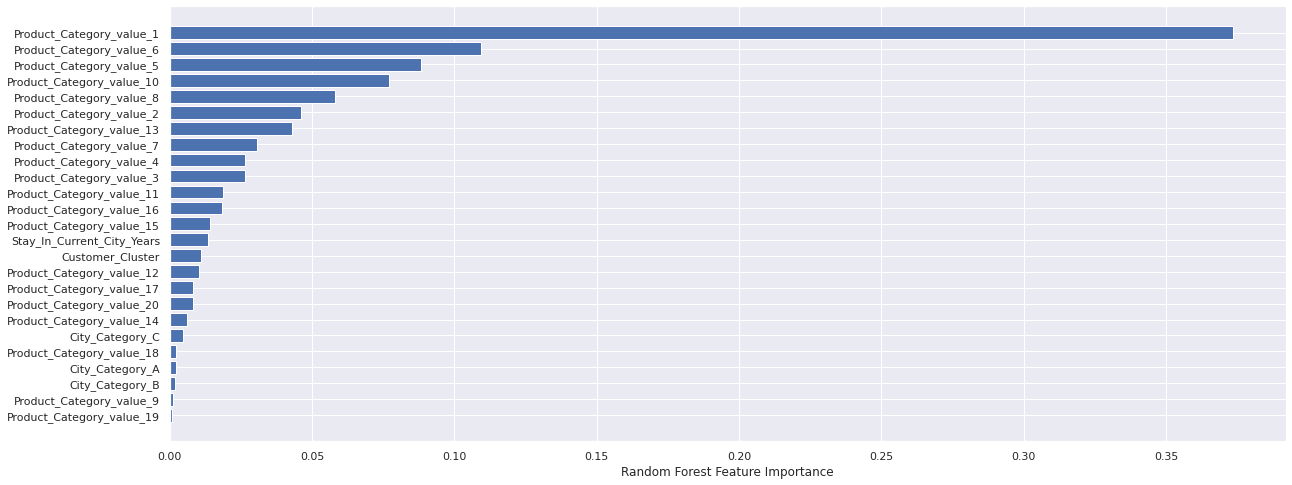

In [492]:
plt.figure(figsize=(20,8))
sorted_idx = rfc.feature_importances_.argsort()
plt.barh(X.columns[sorted_idx], rfc.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")


In [ ]:
from sklearn.inspection import permutation_importance
perm_importance = permutation_importance(rfc, X_test, y_test)


Text(0.5, 0, 'Permutation Importance')

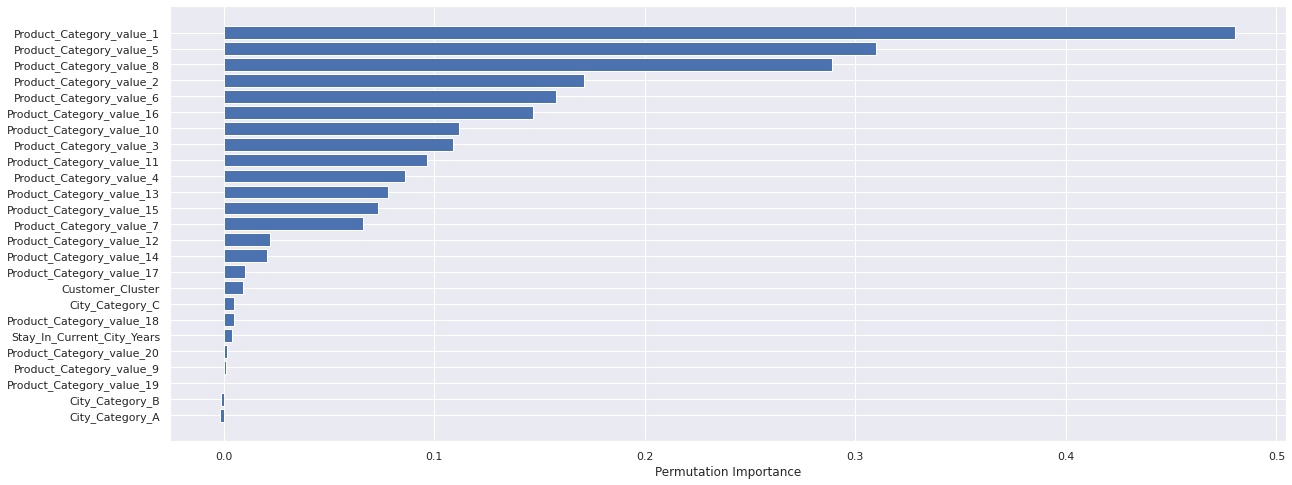

In [496]:
plt.figure(figsize=(20,8))
sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(X.columns[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")

In [497]:
print(rfc.get_params())

{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


In [499]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)
{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

In [ ]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


In [ ]:
rf_random.best_params_